In [7]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./datasets/chess/"
# datasets_name = "Open_MI.tsv"
datasets_name = "query.tsv"
# datasets_name = "query_retrieved.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'question', 'answer', 'image']


index : chess_00000007
question : what is it?
answer : Rook


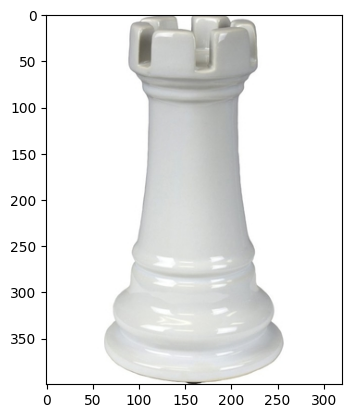

support
{'index': 'chess_00000171', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQIALwAvAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAH0AXYDASIAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAAECAwQFBgf/xABQEAACAQMCAwUFAQsHCgQHAAAAAQIDBBEFIRIxQRNRYXGBBhQiMpFSIzNCYnJzkqGxssE0Q1NUgqLRFSQlNVWTs9LT8ERjwvEHRXSElOHi/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAEDAgT/xAAiEQEBAAMBAAICAwEBAAAAAAAAAQIDETESIQRBMjNxUWH/2gAMAwEAAhEDEQA/APeXMrAJZKSwe55ywPAwAQwwNIBYGkGAwAYDHcPAJALA0hjQCAY8AJIMDwGAFgeAwPAC6AMYEgUGCDen/q+4/OU/2TOZI6qa/wBH3H5yn+yZz4MNX88lvicDwPAYPQhYDAwwBOAwVgMASBQASBQgELBWBAIRQYAkMFNCwBLQsFYACReRYsATgRWAwBIFYACEUGAS7iAwPAYHgoSRSDA8ECAeARQsDwMEngASHgYYAWBoBgIB4DBAsBgeB4AWAwNIMFCwPAYG0To3iuHT6ufw6sUvRNv95HPg6Wv9HR/Pv91HPgw0ffb/AOrknAYKwDR6ELAsDwGADAYGLACwGB4DACwLBTACcAUwwQSA8ABIYKEUSGCmLAEiKwAEhgeAwAsAPAEEJDSAaAAGhoBDHgADA0gwABgaBDAMANDwBOAKA

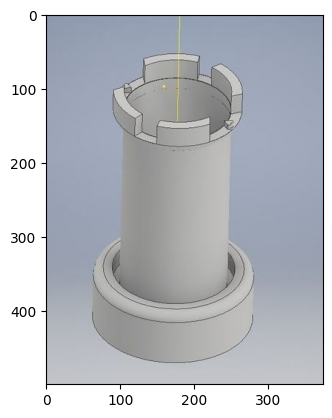

{'index': 'chess_00000064', 'question': 'what is it?', 'answer': 'Queen', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsICAgICAsICAsQCwkLEBMOCwsOExYSEhMSEhYVERMSEhMRFRUZGhsaGRUhISQkISEwLy8vMDY2NjY2NjY2Njb/2wBDAQwLCwwNDA8NDQ8TDg4OExQODw8OFBoSEhQSEhoiGBUVFRUYIh4gGxsbIB4lJSIiJSUvLywvLzY2NjY2NjY2Njb/wAARCANvAWADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiii

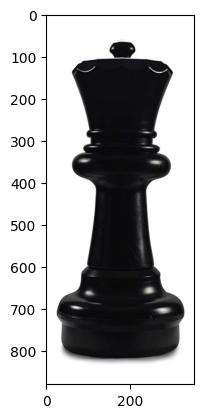

{'index': 'chess_00000134', 'question': 'what is it?', 'answer': 'Pawn', 'image': '/9j/4AAQSkZJRgABAQIAdgB2AAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAUUBRQDASIAAhEBAxEB/8QAHAABAAMBAQEBAQAAAAAAAAAAAAEEBQYDAgcI/8QASRABAQEAAQIDBQQGBgcHBAEFAAECAwQhBRFBEiIxcdEGE1FhFHKBkbHBIzIzNFKhFTVCU2KS4QcWQ1SCsvAkJWOiRDZzdJPx/8QAFQEBAQAAAAAAAAAAAAAAAAAAAAH/xAAVEQEBAAAAAAAAAAAAAAAAAAAAEf/aAAwDAQACEQMRAD8A/pn3vD9+uul1fncX6L+bNZlzZZe8sNSazZqSy9rKoe94fv110ur87i/QGgIzZrMubLL3liQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEaszm3Vkk7201ZnNurJJ3tqh73iG/XPS5vyu79ARrquq5tXXScUvF8Jdeo0MyZzJmSSdpIAlGpNZs1JZe1lSAz/e8P3666XV+dxfov5s1mXNll7yw1JrNmpLL2sqh73h+/XXS6vzuL9AaAjNmsy5ssveWJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

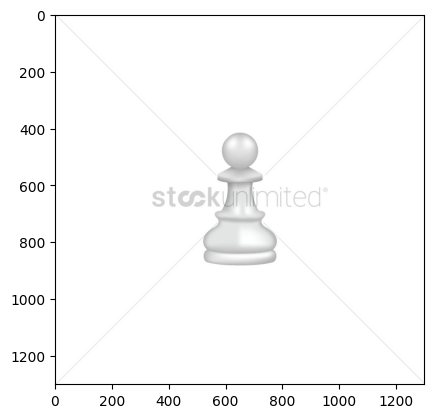

{'index': 'chess_00000086', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/7S8YUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAEEcAVoAAxslRxwBWgADGyVHHAIAAAIABBwCNwAIMjAxMzA1MTQcAjwACzAwMDAwMCswMDAwHAI+AAgyMDEzMDUxNAA4QklNBCUAAAAAABBwiE016tKyUtrsyJNAjnUIOEJJTQPqAAAAABggPD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPCFET0NUWVBFIHBsaXN0IFBVQkxJQyAiLS8vQXBwbGUvL0RURCBQTElTVCAxLjAvL0VOIiAiaHR0cDovL3d3dy5hcHBsZS5jb20vRFREcy9Qcm9wZXJ0eUxpc3QtMS4wLmR0ZCI+CjxwbGlzdCB2ZXJzaW9uPSIxLjAiPgo8ZGljdD4KCTxrZXk+Y29tLmFwcGxlLnByaW50LlBhZ2VGb3JtYXQuUE1Ib3Jpem9udGFsUmVzPC9rZXk+Cgk8ZGljdD4KCQk8a2V5PmNvbS5hcHBsZS5wcmludC50aWNrZXQuY3JlYXRvcjwva2V5PgoJCTxzdHJpbmc+Y29tLmFwcGxlLmpvYnRpY2tldDwvc3RyaW5nPgoJCTxrZXk+Y29tLmFwcGxlLnByaW50LnRpY2tldC5pdGVtQXJyYXk8L2tleT4KCQk8YXJyYXk+CgkJCTxkaWN0PgoJCQkJPGtleT5jb20uYXBwbGUucHJpbnQuUGFnZUZvcm1hdC5QTUhvcml6b250YWxSZXM8L2tleT4KCQkJCTxyZWFsPjcyPC9yZWFsPgoJCQkJPGtleT5jb20uYXBwbGUucHJpbnQudGlja2V0LnN0YXRlRmxhZzwva2V5PgoJCQkJPGludGVnZXI+MDwvaW50ZWdlc

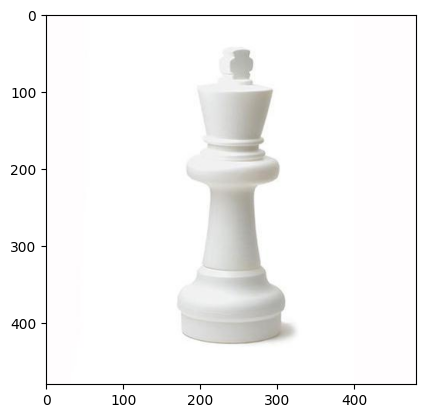

{'index': 'chess_00000120', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQIAdgB2AAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAUUBRQDASIAAhEBAxEB/8QAHAABAAMAAwEBAAAAAAAAAAAAAAEEBQIDBgcI/8QAShABAQABAgMFBAQJCgYCAgIDAAECAwQFESEiMUFx0QYSUWETFLHBFSMyNFJygZGhByQzNUJzkpOy4SVEU1RigqLwFkM2RWNk8f/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/8QAFREBAQAAAAAAAAAAAAAAAAAAABH/2gAMAwEAAhEDEQA/AP0z2uH5+OW1yvncL6L+NmWMuNll6ywykyxsyksvSyqHa4fn45bXK+dwvoDQEY2ZYy42WXrLEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIysxxtysknW2mVmONuVkk621Q7XEM/HHa43yud9ARlut1rZXLaaUul3S5eI0MZMcZMZJJ0kgCUZSZY2ZSWXpZUgM/tcPz8ctrlfO4X0X8bMsZcbLL1lhlJljZlJZellUO1w/Pxy2uV87hfQGgIxsyxlxssvWWJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

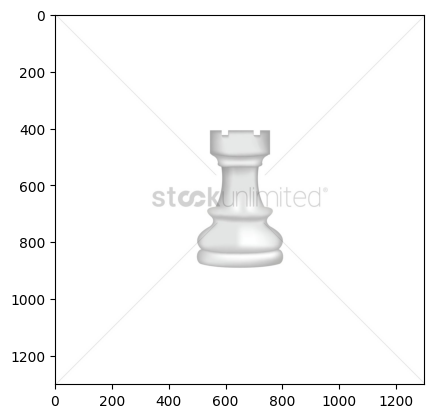

{'index': 'chess_00000135', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAsICAoIBwsKCQoNDAsNERwSEQ8PESIZGhQcKSQrKigkJyctMkA3LTA9MCcnOEw5PUNFSElIKzZPVU5GVEBHSEX/2wBDAQwNDREPESESEiFFLicuRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUVFRUX/wgARCAaaBkADASIAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAECAwQFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAfXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

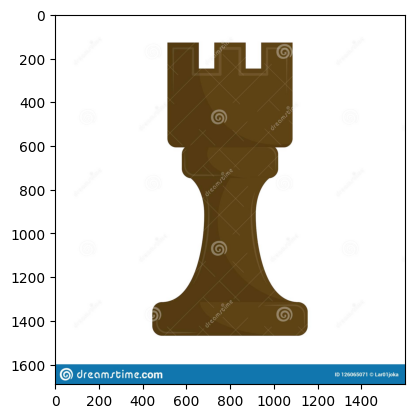

{'index': 'chess_00000070', 'question': 'what is it?', 'answer': 'Bishop', 'image': '/9j/4AAQSkZJRgABAQIAdgB2AAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHR

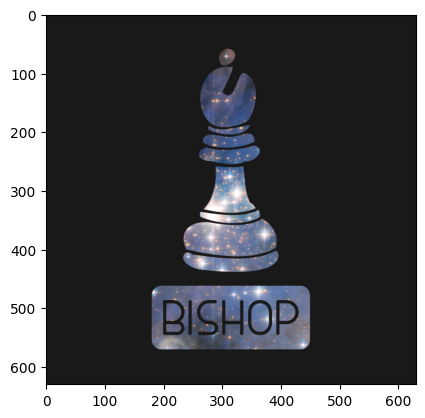

{'index': 'chess_00000106', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAgEASABIAAD/4QqlRXhpZgAATU0AKgAAAAgACgEPAAIAAAASAAAAhgEQAAIAAAAKAAAAmAESAAMAAAABAAEAAAEaAAUAAAABAAAAogEbAAUAAAABAAAAqgEoAAMAAAABAAIAAAExAAIAAAAbAAAAsgEyAAIAAAAUAAAAzQITAAMAAAABAAIAAIdpAAQAAAABAAAA5AAAA3ROSUtPTiBDT1JQT1JBVElPTgBOSUtPTiBEODAAAAAASAAAAAEAAABIAAAAAUFkb2JlIFBob3Rvc2hvcCBDUyBXaW5kb3dzADIwMTE6MDE6MTkgMTE6Mjg6MzUAAAAAACeCmgAFAAAAAQAAAr6CnQAFAAAAAQAAAsaIIgADAAAAAQABAACIJwADAAAAAQKAAACQAAAHAAAABDAyMjGQAwACAAAAFAAAAs6QBAACAAAAFAAAAuKRAQAHAAAABAECAwCRAgAFAAAAAQAAAvaSBAAKAAAAAQAAAv6SBQAFAAAAAQAAAwaSBwADAAAAAQAFAACSCAADAAAAAQADAACSCQADAAAAAQAAAACSCgAFAAAAAQAAAw6ShgAHAAAALAAAAxaSkAACAAAAAzUwAACSkQACAAAAAzUwAACSkgACAAAAAzUwAACgAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAcKgAwAEAAAAAQAAAcKgBQAEAAAAAQAAA1SiFwADAAAAAQACAACjAAAHAAAAAQMAAACjAQAHAAAAAQEAAACjAgAHAAAACAAAA0KkAQADAAAAAQAAAACkAgADAAAAAQABAACkAwADAAAAAQABAACkBAAFAAAAAQAAA0qkBQADAAAAAQBLAACkBgADAAAAAQAAAACkBwADAAAAAQABAACkCAADAAAAA

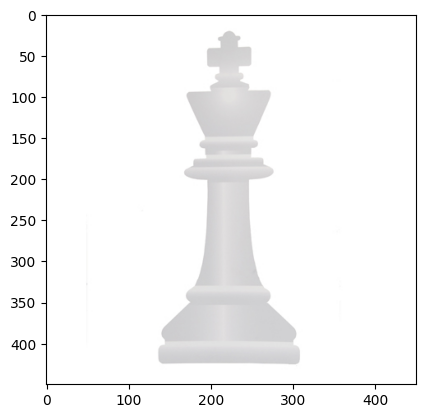

{'index': 'chess_00000189', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAH0AfQDAREAAhEBAxEB/8QAHgABAAEEAwEBAAAAAAAAAAAAAAcFBggJAQMEAgr/xABtEAABAwMDAgMEBAYKCg0HBg8BAgMEAAUGBwgRCRITITEKFCJBFTJRYRYjQnGBkRgZJDNSWZeYsdMXOlhicnZ3kqHSGiU5Q1OClqKytcHF1DQ1c4SjtMI2RZPDxtEmJ0RGVFdkZmd0iKSz1eH/xAAXAQEBAQEAAAAAAAAAAAAAAAAAAQID/8QAIxEBAAIBBAMBAQEBAQAAAAAAAAERAhIhMVEiMkFhQnEzgf/aAAwDAQACEQMRAD8A3+UCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUCgUHCldqSfsoNYW2Trq72t8kzL5+zDpSoy2y4fffoy4S7hrRAtzyFqC1NlTb0cAlSEFR7CsJ54Kia

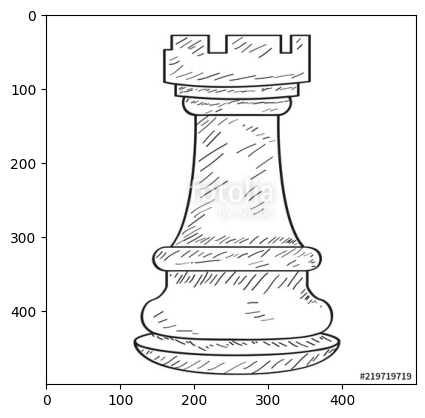

{'index': 'chess_00000184', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAQIAdgB2AAD/2wCEAAkJCQkKCQoMDAoPEA4QDxUUEhIUFSAXGRcZFyAxHyQfHyQfMSw1KygrNSxOPTc3PU5aTEhMWm5iYm6Kg4q0tPIBCQkJCQoJCgwMCg8QDhAPFRQSEhQVIBcZFxkXIDEfJB8fJB8xLDUrKCs1LE49Nzc9TlpMSExabmJiboqDirS08v/CABEIAdYBwgMBIgACEQEDEQH/xAAcAAEAAAcBAAAAAAAAAAAAAAAAAQIEBQYHCAP/2gAIAQEAAAAA3iAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABqy27lQ5e898Zcw/VXQoAAAAAABqrHd7vPllu/O2vdb9FAAAAAAAGqtVZR72a0qjJ2LXrooAAAAAAA1RqYAZH0aAAAAAAASeAAn9wAAAAAADRlGAG67oAAAAAAAAAAAAAAAADz5i8gN6ZkAAAAAAADReEg9+oZgAAAAAAAa70yDMt8AAAAAAAAWDnQG1dqgAAAAAAAScrTBvHOQAAAAAAAHL9KI9DZGAAAAAAAA5wsgdOVwAAAAAAhEA53x0eXU9QAhEAAAAC1XUJaSPrz7YJU3h1ZPYr6CFtuYAAAAxj1q6KNVecf9rZD10xZJk0N5ZLjuRWi81+MrzSUWSRAAAAYxcF2x6e/Y5faeSp5glllqfPdOwMbyS13OgprzDCMtqwAAAEKSxVl8x6p9rPlWN3Ow6CqZqOq89m7Js+VLJGiuNVSUGTAAAAHj7CHn6RMA0xJNGDON3iWaCJCIAAAAAGldfgr+mogAAAAAABLzBTAdB5OAAAAAAAGvtLAM63gAAAAAAAIc3WgA6

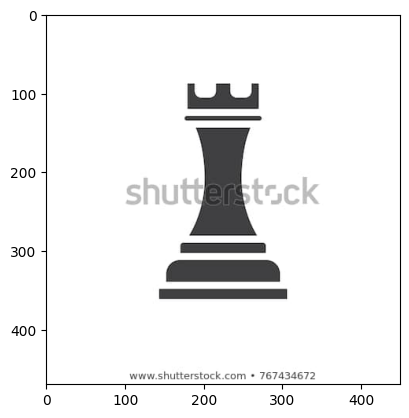

Support Counter: 10


In [9]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# path = "./datasets/clevr/"
# path = "./datasets/open_mi/"
# path = "./datasets/clevr/"
path = "./datasets/chess/"

# datasets_name = "Open_MI.tsv"
# datasets_name = "query.tsv"
datasets_name = "query_herding_retrieved.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    support_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support")
                for item in support:
                    support_counter += 1
                    print(item)
                    print("Item ID:", item['index'])
                    print("Question:", item['question'])
                    print("Answer:", item['answer'])
                    img = item['image']
                    img = Image.open(BytesIO(base64.b64decode(img)))
                    plt.imshow(img)
                    plt.show()
                    
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break
print("Support Counter:", support_counter)

In [1]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zxy/LMUData/MME.tsv'

In [31]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.merge"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                for key in support:
                    # image_base64 = support[key]['images']
                    # for img in image_base64:
                    #     img = Image.open(BytesIO(base64.b64decode(img)))
                    #     plt.imshow(img)
                    #     plt.show()
                    print(f"{key}: ---------\n ")
                    # for idx in support[key]['image_path']:
                    #     print(f"{idx}")
                    for img, img_path in zip(support[key]['image'], support[key]['image_path']):
                        img = Image.open(BytesIO(base64.b64decode(img)))
                        plt.imshow(img)
                        plt.show()
                        print(f"{img_path}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# Clevr dataset

In [ ]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
datasets_name = "CLEVR.tsv"
datasets_name = "CLEVR_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                    for key, value in item.items():
                        if key == "image":
                            img = Image.open(BytesIO(base64.b64decode(value)))
                            plt.imshow(img)
                            plt.show()
                        else:
                            print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# operator_induction

['index', 'question', 'answer', 'operator', 'image', 'support']
index : operator_induction_query_1_1_+
question : What is the result of the following mathematical expression?
answer : 2
operator : +


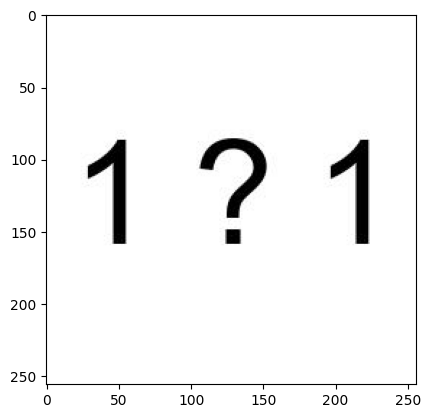

support ---
question: What is the result of the following mathematical expression?
answer: [13, 1, 42]


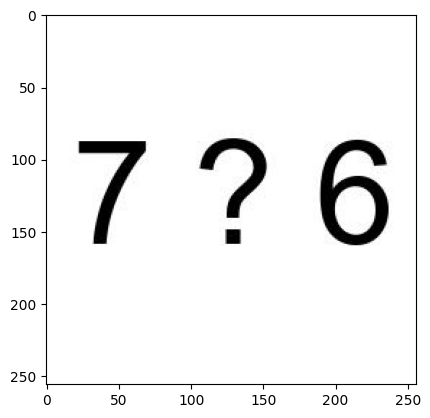

index: operator_induction_support_7_6
question: What is the result of the following mathematical expression?
answer: [8, -4, 12]


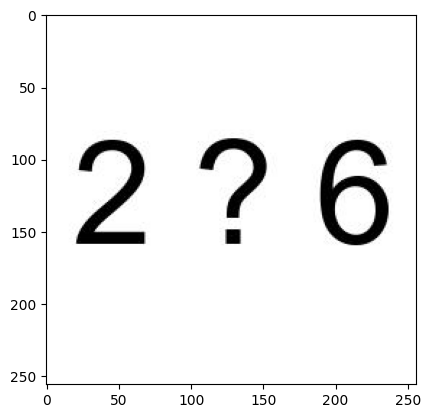

index: operator_induction_support_2_6
question: What is the result of the following mathematical expression?
answer: [12, 6, 27]


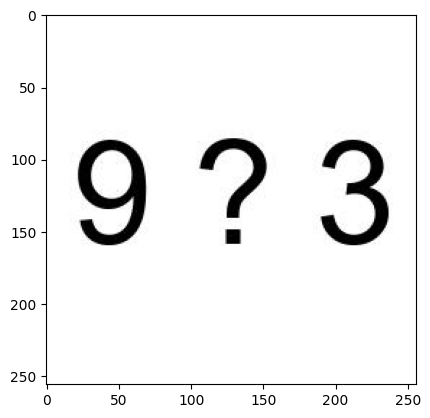

index: operator_induction_support_9_3
question: What is the result of the following mathematical expression?
answer: [11, -3, 28]


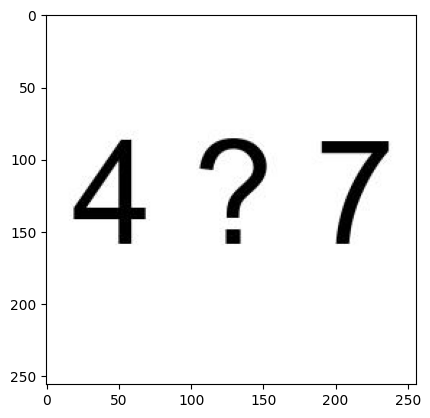

index: operator_induction_support_4_7
question: What is the result of the following mathematical expression?
answer: [11, -7, 18]


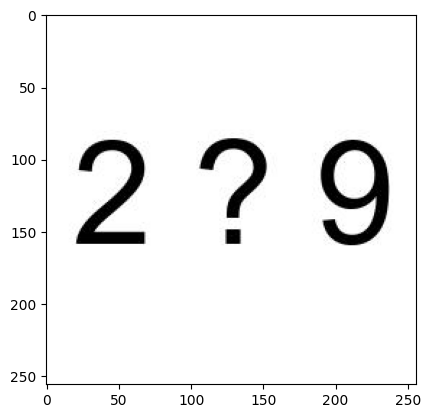

index: operator_induction_support_2_9
question: What is the result of the following mathematical expression?
answer: [11, 1, 30]


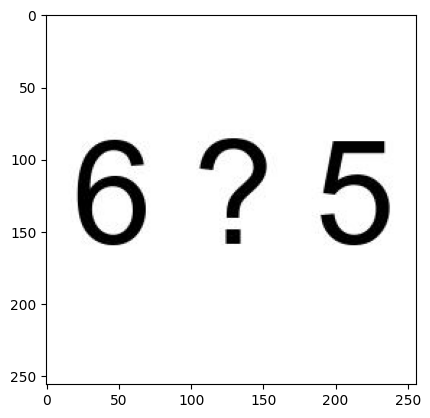

index: operator_induction_support_6_5
question: What is the result of the following mathematical expression?
answer: [5, 3, 4]


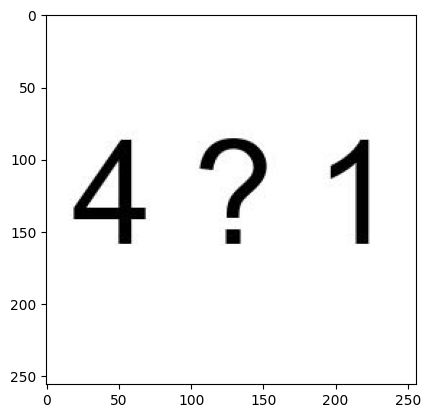

index: operator_induction_support_4_1
question: What is the result of the following mathematical expression?
answer: [13, 3, 40]


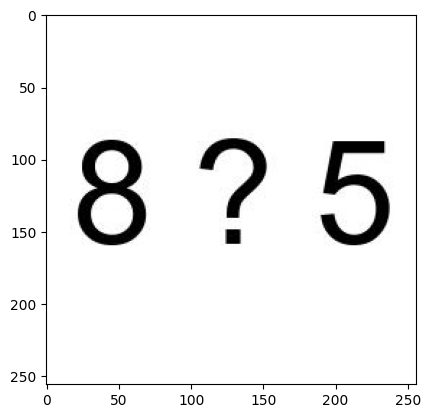

index: operator_induction_support_8_5


In [7]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
# datasets_name = "CLEVR.tsv"
datasets_name = "operator_induction_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                        for key, value in item.items():
                            if key == "image":
                                img = Image.open(BytesIO(base64.b64decode(value)))
                                plt.imshow(img)
                                plt.show()
                            else:
                                print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break